# 4 多层感知机

## 4.2 多层感知机制手动实现

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

C:\Users\ADRIN\Anaconda3\envs\torch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### 4.2.1  初始化模型参数
实现一个包含256隐藏单元的隐藏层

In [7]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True)* 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True)* 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 4.2.2 激活函数

In [8]:
def relu(X): 
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 4.2.3 模型

In [11]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)#@相当于矩阵乘法
    return (H@W2 + b2)

### 4.2.4 损失函数

In [12]:
loss = nn.CrossEntropyLoss()

### 4.2.5 训练

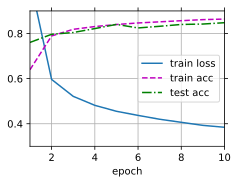

In [13]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

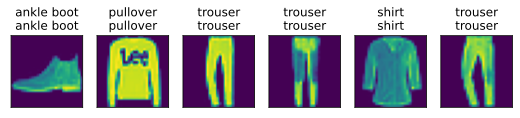

In [14]:
d2l.predict_ch3(net, test_iter)

## 4.3 pytorch实现多层感知

In [1]:
import torch
from d2l import torch as d2l
from torch import nn

In [3]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

C:\Users\ADRIN\Anaconda3\envs\torch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
net = nn.Sequential(nn.Flatten(), 
                    nn.Linear(784,256), 
                    nn.ReLU(),
                    nn.Linear(256, 10))
            
def init_weight(net):
    if type(net) == nn.Linear:
        nn.init.normal_(net.weight, std=0.01)

net.apply(init_weight)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

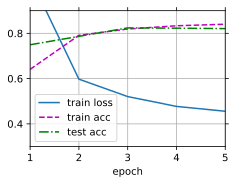

In [13]:
loss = nn.CrossEntropyLoss()
batch_size, lr, num_epochs = 256, 0.1, 5
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 4.4 模型选择
通过实现多项式回归拟合来探索欠拟合、过拟合等概念

In [1]:
import math 
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import tsensor

#### 4.4.4.1 生成数据集

In [2]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

test_features = np.arange(n_test+n_train, dtype=np.float32).reshape(-1, 1)

'''print(test_features.reshape(-1, 4).shape, true_w[0:4].shape)
print(test_features.reshape(-1, 4))
print(true_w[0:4])
print(test_features.reshape(-1, 4)@true_w[0:4])'''
poly_features = np.power(test_features, np.arange(max_degree))
#print(poly_features)
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1) #gamma(n) = (n-1)!

true_b = np.random.normal(size=(poly_features.shape[0], 1))
y_lables = poly_features[:, 0:4]@true_w[0:4] 
print(y_lables[:10])
y_lables = np.dot(poly_features, true_w)
print(y_lables)

[  5.           5.43333333   8.06666667  18.5         42.33333333
  85.16666667 152.6        250.23333333 383.66666667 558.5       ]
[5.00000000e+00 5.43333333e+00 8.06666667e+00 1.85000000e+01
 4.23333333e+01 8.51666667e+01 1.52600000e+02 2.50233333e+02
 3.83666667e+02 5.58500000e+02 7.80333333e+02 1.05476667e+03
 1.38740000e+03 1.78383333e+03 2.24966667e+03 2.79050000e+03
 3.41193333e+03 4.11956667e+03 4.91900000e+03 5.81583333e+03
 6.81566667e+03 7.92410000e+03 9.14673333e+03 1.04891667e+04
 1.19570000e+04 1.35558333e+04 1.52912667e+04 1.71689000e+04
 1.91943333e+04 2.13731667e+04 2.37110000e+04 2.62134333e+04
 2.88860667e+04 3.17345000e+04 3.47643333e+04 3.79811667e+04
 4.13906000e+04 4.49982333e+04 4.88096667e+04 5.28305000e+04
 5.70663333e+04 6.15227667e+04 6.62054000e+04 7.11198333e+04
 7.62716667e+04 8.16665000e+04 8.73099333e+04 9.32075667e+04
 9.93650000e+04 1.05787833e+05 1.12481667e+05 1.19452100e+05
 1.26704733e+05 1.34245167e+05 1.42079000e+05 1.50211833e+05
 1.58649267e+

In [3]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train+n_test+1, 1))
np.random.shuffle(features)#注意这个函数没有返回值
poly_features = np.power(features, np.arange(max_degree))
#注意这里相当于一个广播，将每行featrue的元素（实际上只有一个）
#计算从0-20次方

for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)

#y_lables = poly_features[:, 0:4]@true_w[0:4]
y_lables = poly_features@true_w
#print(y_lables[:10])
print(poly_features.shape, true_w.shape)
#y_lables = np.dot(poly_features, true_w)
print(y_lables[:10])
y_lables += np.random.normal(size=y_lables.size, scale=0.1)
y_lables

[5.24012159 4.27609559 5.31896861 4.96485535 3.47343237 5.31201891
 5.26322069 0.01517789 6.08438716 2.49688225]
(201, 20) (20,)
[5.24012159 4.27609559 5.31896861 4.96485535 3.47343237 5.31201891
 5.26322069 0.01517789 6.08438716 2.49688225]


array([ 5.21658070e+00,  4.30711279e+00,  5.35505216e+00,  4.99222386e+00,
        3.24568559e+00,  5.29035013e+00,  5.36630700e+00,  6.34977909e-02,
        5.93344244e+00,  2.32572866e+00,  5.33693634e+00,  5.43964855e+00,
       -1.25399066e+00,  5.23660477e+00,  4.86934099e+00,  5.14375374e+00,
        4.28559923e+00,  4.28470959e+00,  5.21123139e+00,  4.37767313e+00,
        5.37866800e+00,  5.18938747e+00,  1.02979522e+00,  2.89721396e+00,
        5.53583757e+00,  5.16577431e+00,  2.11166873e+00,  2.05731985e+00,
       -6.58874764e+00,  4.61393680e+00, -1.34170051e+01,  4.65214755e+00,
        2.29279261e+00, -3.91989554e+00,  3.84477322e+00,  4.52524757e+00,
        3.95081603e+00,  1.99554192e+00,  5.29995049e+00,  5.59515062e+00,
        4.71693647e+00,  5.38962034e+00,  2.29646214e+00,  4.80724746e+00,
        7.20322340e+00,  4.97567480e+00, -3.78802075e-01,  6.29681315e+00,
        2.86735037e+00,  5.28441803e+00,  5.24291784e+00,  5.13488455e+00,
        6.00588118e+00,  

In [11]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# `labels`的维度: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [12]:
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, y_lables]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.3200],
         [-0.4485]]),
 tensor([[ 1.0000e+00,  3.1998e-01,  5.1192e-02,  5.4601e-03,  4.3677e-04,
           2.7951e-05,  1.4906e-06,  6.8138e-08,  2.7253e-09,  9.6892e-11,
           3.1003e-12,  9.0184e-14,  2.4047e-15,  5.9189e-17,  1.3528e-18,
           2.8857e-20,  5.7710e-22,  1.0862e-23,  1.9309e-25,  3.2518e-27],
         [ 1.0000e+00, -4.4850e-01,  1.0058e-01, -1.5037e-02,  1.6860e-03,
          -1.5123e-04,  1.1305e-05, -7.2432e-07,  4.0608e-08, -2.0236e-09,
           9.0761e-11, -3.7006e-12,  1.3831e-13, -4.7718e-15,  1.5287e-16,
          -4.5708e-18,  1.2813e-19, -3.3803e-21,  8.4226e-23, -1.9882e-24]]),
 tensor([5.2166, 4.3071]))

#### 4.4.4.2 对模型进行训练和测试


In [13]:
def evaluate_loss(net, data_iter, loss):
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [14]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式特征中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

In [15]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

AssertionError: Size mismatch between tensors

## 4.5 权重衰减
通过权重衰减来调整过拟合的问题

### 4.5.2 高维线性回归

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

### 4.5.3 从零开始实现

#### 4.5.3.1 初始化模型参数

In [8]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

#### 4.5.3.2 定义L2范数惩罚
实现这一惩罚最方便的方法是对所有项求平方然后求和

In [9]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

#### 4.5.4.4 定义训练代码实现
通过d2l.linreg d2l.squared_loss 导入线性网络和平方损失函数。
其他唯一的变化就是损失函数包含了惩罚项

In [10]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())
    

#### 4.5.3.4 忽略正则化直接训练

w的L2范数是： 13.961432456970215


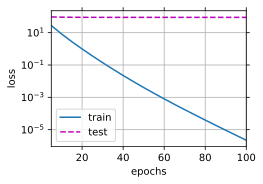

In [11]:
train(lambd=0)

#### 4.5.3.5 使用权重衰减

w的L2范数是： 0.38200974464416504


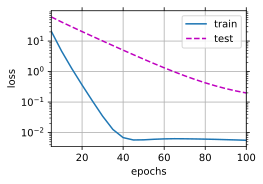

In [12]:
train(lambd=3)

### 4.5.4 简洁实现

In [24]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()#将tensor用均值为mean=0,标准差为std=1的正太分布填充
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    #偏置参数没有衰减
    #https://pytorch-cn.readthedocs.io/zh/latest/package_references/torch-optim/
    trainer = torch.optim.SGD([#z这里使用的是为optimizer的每个参数单独设置选项
        {"params":net[0].weight, 'weight_decay': wd},#对权重参数有衰减
        {"params":net[0].bias}], lr=lr)#偏置参数没有衰减
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())   
    
    
        
        

w的L2范数： 12.507513999938965


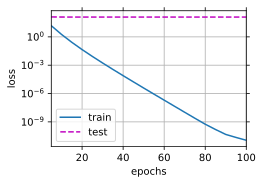

In [25]:
train_concise(0)

w的L2范数： 0.39189019799232483


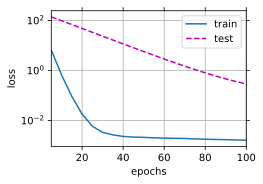

In [26]:
train_concise(3)

## 4.6 Dropout
在训练过程中，随机将一些节点置零，为了减少某些节点权重过大导致过拟合

### 4.6.4 从零开始实现

给定一个概率p 以p的概率抛弃一定的元素，1-p的概率保留一定的元素
对于保留下来的元素重新放大即除以1-p

In [3]:
import torch 
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    #如果dropout==1 所有元素都会被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    #如果dropout==0 所有元素都被保留
    if dropout == 0:
        return X
    #这种使用掩码的方式非常之好看
    #uniform_将tensor用从均匀分布中抽样得到的值填充。
    #就是根据X的shape按照正态分布生成X.size个0,1的元素
    mask = (torch.Tensor(X.shape).uniform_(0, 1) > dropout).float()
    #print('mask:', mask)
    return mask * X / (1.0 - dropout)

#### 4.6.4.1 定义模型参数

In [4]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

#### 4.6.4.2 定义模型

In [9]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training 
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))#这里reshape的作用实际上是给他展平
        #只有在训练的时候才使用dropout
        if self.training == True:
            #在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out

net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

#### 4.6.4.3 训练和测试

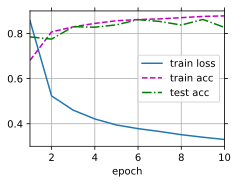

In [10]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 4.6.5 简洁实现

In [17]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Dropout(dropout1),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    nn.Dropout(dropout2),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
        
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

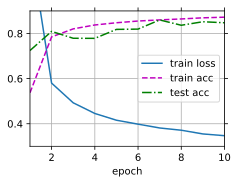

In [18]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 4.7 反向传播

### 通过BP来实现二月桥问题

In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, Dataset

定义网络模型

In [32]:
net = nn.Sequential(nn.Linear(2, 3),
                    nn.ReLU(),
                    nn.Linear(3, 2),)

获取数据

In [33]:
data = pd.read_excel('two_moon_data.xlsx', dtype=np.float32).values
input = torch.from_numpy(data[:,0:-1])
output = torch.from_numpy(data[:, [-1]])
for i in range(len(output)):
    if output[i] == -1:
        output[i] = 0
input.shape, output

(torch.Size([2000, 2]),
 tensor([[1.],
         [1.],
         [1.],
         ...,
         [0.],
         [0.],
         [0.]]))

In [34]:
dataset = TensorDataset(input, output)
batch_size = 256
data = DataLoader(dataset, batch_size)

训练模型

In [41]:
loss = nn.CrossEntropyLoss()
lr = 0.005
num_epochs = 2000
trainer = torch.optim.SGD(net.parameters(), lr=lr)

In [42]:
index = net(input)
index

tensor([[ 1.2451,  6.0883],
        [-6.3634, 10.4285],
        [-4.8712,  9.7130],
        ...,
        [ 2.0154, -1.7714],
        [ 0.4979,  0.9650],
        [ 2.0154, -1.7714]], grad_fn=<AddmmBackward>)

In [43]:
def train(net, data, loss, updater, num_epochs):
    output.reshape(1, -1)
    net.train()
    for epoch in range(num_epochs):
        for X, y in data:
            y_hat = net(X)
            l = loss(y_hat, y.squeeze().long())
            #使用pytorch内置的优化器和损失函数
            updater.zero_grad()
            l.backward()
            updater.step()
        if epoch % 5 == 0:
            print('epoch: ', epoch, 'loss: ', l, flush=True)


In [44]:
train(net, data, loss, trainer, num_epochs)

epoch:  0 loss:  tensor(0.0828, grad_fn=<NllLossBackward>)
epoch:  5 loss:  tensor(0.0853, grad_fn=<NllLossBackward>)
epoch:  10 loss:  tensor(0.0857, grad_fn=<NllLossBackward>)
epoch:  15 loss:  tensor(0.0857, grad_fn=<NllLossBackward>)
epoch:  20 loss:  tensor(0.0857, grad_fn=<NllLossBackward>)
epoch:  25 loss:  tensor(0.0857, grad_fn=<NllLossBackward>)
epoch:  30 loss:  tensor(0.0857, grad_fn=<NllLossBackward>)
epoch:  35 loss:  tensor(0.0856, grad_fn=<NllLossBackward>)
epoch:  40 loss:  tensor(0.0856, grad_fn=<NllLossBackward>)
epoch:  45 loss:  tensor(0.0856, grad_fn=<NllLossBackward>)
epoch:  50 loss:  tensor(0.0855, grad_fn=<NllLossBackward>)
epoch:  55 loss:  tensor(0.0855, grad_fn=<NllLossBackward>)
epoch:  60 loss:  tensor(0.0855, grad_fn=<NllLossBackward>)
epoch:  65 loss:  tensor(0.0855, grad_fn=<NllLossBackward>)
epoch:  70 loss:  tensor(0.0854, grad_fn=<NllLossBackward>)
epoch:  75 loss:  tensor(0.0854, grad_fn=<NllLossBackward>)
epoch:  80 loss:  tensor(0.0854, grad_fn=<

In [45]:
x = input
y = net(x)
y

tensor([[ 0.9744,  6.2510],
        [-5.9781,  9.5026],
        [-3.5386,  8.7857],
        ...,
        [ 2.2512, -2.0071],
        [ 0.8442,  1.1203],
        [ 2.2512, -2.0071]], grad_fn=<AddmmBackward>)

In [46]:
x = input
y = net(x).detach().numpy()
ans = []
for i in y:
    if i[0] > i[1]:
        ans.append(0)
    else:
        ans.append(1)

count = 0
for i in range(len(ans)):
    if ans[i] != output[i]:
        count = count + 1

1 - count / len(ans)

0.9605

In [289]:
for i in y:
    if i != 1:
        print(i)
        

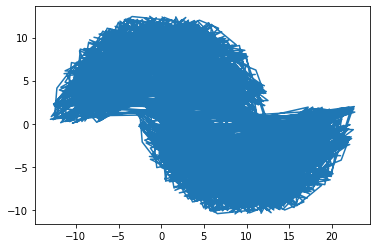

In [290]:
plt.plot(x[:, 0], x[:, 1])
